In [1]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 1025):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


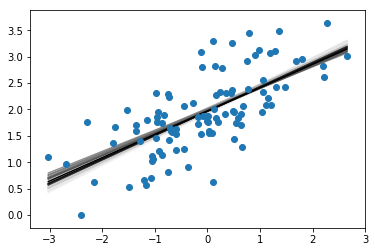

[array([0., 0.]), array([0.02644594, 0.18298175]), array([0.14342802, 0.39380733]), array([0.18270379, 0.55199686]), array([0.16562783, 0.70272584]), array([0.19538217, 0.82040671]), array([0.23019374, 0.93230621]), array([0.2407617, 1.0375588]), array([0.24580573, 1.15085041]), array([0.25111764, 1.2387321 ]), array([0.25551126, 1.3011549 ]), array([0.29415304, 1.34424942]), array([0.30743147, 1.41231946]), array([0.35188283, 1.47929796]), array([0.3652541 , 1.53093517]), array([0.38402631, 1.56834642]), array([0.38381499, 1.61044598]), array([0.3901908 , 1.66700032]), array([0.41024414, 1.67556889]), array([0.4282076 , 1.71081949]), array([0.44115447, 1.72646089]), array([0.45256845, 1.74370002]), array([0.47498799, 1.76639179]), array([0.46942653, 1.78327497]), array([0.45294132, 1.80751678]), array([0.45935638, 1.79959852]), array([0.45027718, 1.80675323]), array([0.47668527, 1.83142008]), array([0.47299383, 1.83995261]), array([0.46247513, 1.83872403]), array([0.45337996, 1.857690

In [5]:
if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data/data.csv', delimiter = ',')

    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()
    
    print(regression_coef)

In [3]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=25, learning_rate=0.005):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [4]:
linear_regression(X, y)

(array([-3.91547257e-02,  2.72851575e-05, -5.27626733e-02, -4.04063449e-02,
        -3.60216551e-02, -2.18169321e-02, -4.94100970e-02, -3.87942468e-02,
        -2.51240331e-02, -3.06048517e-02, -2.85547919e-02, -4.25825111e-02,
        -1.78798238e-02, -5.45299120e-02, -1.42012249e-02, -4.93074279e-02,
        -9.28832237e-03, -2.88321910e-02, -3.34795879e-02, -3.69706888e-02,
        -2.99033083e-02, -5.11164688e-02, -5.76883439e-02, -2.77337885e-02,
        -4.03076985e-02, -3.13375281e-02, -2.70618040e-02, -1.86961048e-02,
        -3.12733380e-02, -3.23129725e-02, -2.77629976e-02, -3.40712910e-02,
        -5.41022696e-02, -3.25594134e-02, -3.30250102e-02, -2.43946799e-02,
        -3.00007303e-02, -3.07299086e-02, -1.97609255e-02, -2.92091109e-02,
        -1.16680778e-02, -5.45680412e-02, -9.95628401e-03, -3.99187101e-02,
        -2.16528713e-02, -2.37526041e-02, -3.07096197e-02, -3.34890327e-02,
        -4.07579036e-02, -5.68900781e-02, -3.63105979e-02, -2.69797736e-02,
        -4.8